In [1]:
# STARTING THE CODE 
# -----------------------------------------------------

# Importing seaborn packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from functools import reduce
from sklearn.preprocessing import MinMaxScaler

# Applying the default theme to seaborn
#sns.set_theme()

In [2]:
#------------------------------------------------------
# INPUT NECESSARY: MAKE SURE THIS IS THE CORRECT DIRECTORY
#------------------------------------------------------
import os
os.chdir('/Users/crosnier') # Change your user name accordingly

In [7]:
# IMPORTING NECESSARY DATA

# LCA database
LCA_database = pd.read_excel('Desktop/PDM/Modelling_data/LCA impacts/LCA_database_ecoinvent_agribalyse.xlsx', sheet_name='scoped_env_impacts', header=0)

# Livestocks matched LCA
livestock_matched_LCA = pd.read_excel('Desktop/PDM/Modelling_data/computed_data/animals_matched_LCA.xlsx', sheet_name='livestock_matched_2050', header=0)

# Data from the scenarios
crops_fish = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios_31-10-2024.xlsx', sheet_name='crops_fish', header=1)
livestock = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios_31-10-2024.xlsx', sheet_name='livestock_conv_org_for_code', header=0)
feed = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='feed', header=0)
crops_fish_T = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='crops_fish_T', header=0)
livestock_T = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='livestock_T', header=0)
livestock_T2 = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='livestock_T2', header=0)
crop_area_T = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios_31-10-2024.xlsx', sheet_name='crop_area_T_2', header=0)
crop_fish_no_feed = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios_31-10-2024.xlsx', sheet_name='crop_fish_food_without_feed', header=0)
livestock_conv_org_T = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='livestock_conv_org_T', header=0)

In [42]:
# CREATING CUSTOM PALETTES

# SCENARIOS _____________________________________

custom_palette_sce1 = [
    (195, 161, 122),  # rgba(195, 161, 122, 1)
    (183, 118, 82),   # rgba(183, 118, 82, 1)
    (229, 221, 135),  # rgba(229, 221, 135, 1)
    (86, 125, 74)     # rgba(86, 125, 74, 1)
]

# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_sce1 = [(r/255, g/255, b/255) for r, g, b in custom_palette_sce1]

custom_palette_sce2 = [
    (216, 186, 115),  # rgba(216, 186, 115, 1)
    (170, 143, 78),   # rgba(170, 143, 78, 1)
    (180, 209, 136),  # rgba(180, 209, 136, 1)
    (112, 142, 67)
]

# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_sce2 = [(r/255, g/255, b/255) for r, g, b in custom_palette_sce2]

custom_palette_sce3 = [
    (251, 188, 192),  # rgba(251, 188, 192, 1)
    (197, 120, 125),  # rgba(197, 120, 125, 1)
    (192, 212, 133),  # rgba(192, 212, 133, 1)
    (126, 149, 60),    # rgba(126, 149, 60, 1)
    (251, 188, 192),  # rgba(251, 188, 192, 1)
    (197, 120, 125)  # rgba(197, 120, 125, 1)
]

# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_sce3 = [(r/255, g/255, b/255) for r, g, b in custom_palette_sce3]


# CROPS _____________________________________

custom_palette_crops = [
    (231, 185, 0),
    (246, 231, 171),
    (255, 213, 39),
    (255, 190, 59),
    (255, 239, 178),
    (235, 150, 0),
    (195, 157, 0),
    (214, 189, 235),
    (155, 134, 173),
    (121, 81, 156),
    (152, 97, 2),
    (157, 206, 137),
    (217, 244, 206),
    (85, 127, 68),
    (140, 182, 210),
    (82, 123, 149),
    (221, 158, 62),
    (125, 56, 126),
    (81, 128, 28),
    (185, 218, 147),
    (131, 180, 75)
]
# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_crops = [(r/255, g/255, b/255) for r, g, b in custom_palette_crops]

# LIVESTOCK _____________________________________

custom_palette_livestock = [
    (231, 190, 180),
    (255, 231, 224),
    (189, 129, 113),
    (255, 190, 173),
    (212, 74, 74),
    (249, 130, 130),
    (210, 109, 109),
    (141, 52, 52),
    (255, 182, 217),
    (255, 144, 110),
    (189, 97, 69),
    (134, 203, 226)
]
# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_livestock = [(r/255, g/255, b/255) for r, g, b in custom_palette_livestock]

# LIVESTOCK, FISH, CROPS _____________________________________
custom_palette_lfc1 = [
    (231, 190, 180),
    (255, 231, 224),
    (189, 129, 113),
    (255, 190, 173),
    (212, 74, 74),
    (249, 130, 130),
    (210, 109, 109),
    (141, 52, 52),
    (255, 182, 217),
    (255, 144, 110),
    (189, 97, 69),
    (134, 203, 226),
    (231, 185, 0),
    (255, 234, 147),
    (255, 213, 39),
    (255, 190, 59),
    (235, 150, 0),
    (195, 157, 0),
    (255, 171, 171),
    (255, 138, 138),
    (194, 102, 102),
    (152, 97, 2),
    (85, 169, 92),
    (141, 198, 146),
    (78, 202, 89),
    (140, 182, 210),
    (82, 123, 149),
    (255, 154, 0),
    (109, 67, 109),
    (81, 128, 28),
    (185, 218, 147),
    (131, 180, 75)
]
# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_lfc1 = [(r/255, g/255, b/255) for r, g, b in custom_palette_lfc1]

custom_palette_lfc2 = [
    (255, 197, 183),
    (183, 90, 66),
    (211, 62, 23),
    (248, 131, 97),
    (212, 74, 74),
    (249, 130, 130),
    (210, 109, 109),
    (141, 52, 52),
    (255, 182, 217),
    (255, 144, 110),
    (189, 97, 69),
    (134, 203, 226),
    (231, 185, 0),
    (255, 234, 147),
    (255, 213, 39),
    (255, 190, 59),
    (235, 150, 0),
    (195, 157, 0),
    (255, 171, 171),
    (255, 138, 138),
    (194, 102, 102),
    (152, 97, 2),
    (54, 203, 67),
    (85, 169, 92),
    (190, 234, 194),
    (140, 182, 210),
    (82, 123, 149),
    (255, 154, 0),
    (109, 67, 109),
    (81, 128, 28),
    (185, 218, 147),
    (131, 180, 75)
]
# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_lfc2 = [(r/255, g/255, b/255) for r, g, b in custom_palette_lfc2]

custom_palette_lfc3 = [
    (255, 197, 183),
    (183, 90, 66),
    (211, 62, 23),
    (248, 131, 97),
    (212, 74, 74),
    (249, 130, 130),
    (210, 109, 109),
    (141, 52, 52),
    (253, 190, 215),
    (255, 144, 110),
    (189, 97, 69),
    (134, 203, 226),
    (231, 185, 0),
    (246, 231, 171),
    (255, 213, 39),
    (255, 190, 59),
    (255, 239, 178),
    (235, 150, 0),
    (195, 157, 0),
    (214, 189, 235),
    (155, 134, 173),
    (121, 81, 156),
    (152, 97, 2),
    (157, 206, 137),
    (217, 244, 206),
    (85, 127, 68),
    (140, 182, 210),
    (82, 123, 149),
    (221, 158, 62),
    (125, 56, 126),
    (81, 128, 28),
    (185, 218, 147),
    (131, 180, 75)
]
# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_lfc3 = [(r/255, g/255, b/255) for r, g, b in custom_palette_lfc3]

custom_palette_lfc4 = [
    (183, 90, 66), # Meat
    (255, 197, 183), # Milk
    (249, 130, 130), # Eggs
    (134, 203, 226), # Seafood
    (231, 185, 0), # Cereals
    (155, 134, 173), # Fruits
    (152, 97, 2), # Nuts
    (157, 206, 137), # Pulses
    (82, 123, 149), # Oilseeds
    (221, 158, 62), # Starchy roots
    (125, 56, 126), # Sugar
    (81, 128, 28), # Vegetables
    (185, 218, 147),
    (131, 180, 75)
]
# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_lfc4 = [(r/255, g/255, b/255) for r, g, b in custom_palette_lfc4]


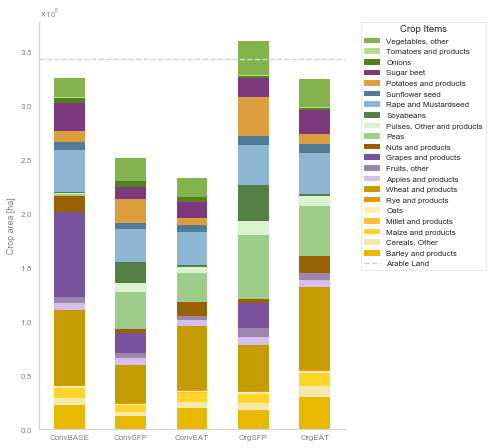

In [10]:
# GRAPH AREA PER CROP TYPE ----------------------------------------------------------------------------------

# GRID STYLE
sns.set_style('white')
sns.set_context('paper')

# COLOR PALETTE
sns.set_palette(custom_palette_crops)

# creating a copy 
crop_area_graph_1 = crop_area_T.copy()

# PLOT
fig, ax = plt.subplots(figsize=(5.5, 7.5))
crop_area_graph_1.plot(kind='bar', stacked=True, ax=ax, edgecolor='None')

# AXIS LABELS & TICKS
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation=0)

plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# AXIS SPINES
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# TICKS AND LABEL COLORS
ax.tick_params(colors='lightgrey')
plt.tick_params(axis='y', colors='grey')
x_label = plt.xlabel('')
x_label.set_color('grey')
y_label = plt.ylabel('Crop area [ha]')
y_label.set_color('grey')
ax.tick_params(axis='x', colors='grey')

# HORIZONTAL LINE
ax.axhline(y=342284.5467, color='lightgrey', linestyle='--')

# LEGEND BOX
handles, labels = ax.get_legend_handles_labels()
custom_legend = [Line2D([0], [0], color='lightgrey', linestyle='--', label='Arable Land')]
combined_handles = list(reversed(handles)) + custom_legend
combined_labels = list(reversed(labels)) + ['Arable Land']

# Create a legend with specified edge color and transparency
legend = ax.legend(combined_handles, combined_labels, bbox_to_anchor=(1.05, 1), loc='upper left', 
                   borderaxespad=0, title='Crop Items', frameon=True)
legend.get_frame().set_edgecolor('lightgrey')   # Set edge color to light grey
legend.get_frame().set_linewidth(0.5)           # Optional: adjust border width
legend.get_frame().set_alpha(1)                 # Ensure background is not too transparent

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Scenario comparison/crop_area_12-2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT
plt.show()

In [223]:
# GRAPHIQUE COMPARATIF DES SCENARIOS 2050 - PREPARATION

# Importing the datas
BAU_swiss = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='BAU_swiss', header=0)
BAU_lancet = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='BAU_lancet', header=0)
OA_swiss = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='OA_swiss', header=0)
OA_lancet = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='OA_lancet', header=0)
ConvBASE = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='ConvBASE', header=0)
#OrgBASE = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='OrgBASE', header=0)


# Summing all the columns and Grouping the data
# Assuming you have four DataFrames: df1, df2, df3, df4
dfs = [ConvBASE, BAU_swiss, BAU_lancet, OA_swiss, OA_lancet]
#dfs = [ConvBASE, BAU_swiss, BAU_lancet, OrgBASE, OA_swiss, OA_lancet]
# Calculate the column sums for each DataFrame
sums = [df.sum(axis=0) for df in dfs]
# Concatenate the sums into a new DataFrame
sum_df = pd.concat(sums, axis=1, sort=True).T

# SETTING NEW INDEX WITH SCENARIO NAMES
# Step 1: Drop the "Item" column
scenario_comparison = sum_df.copy()
scenario_comparison = scenario_comparison.drop(columns=['Item'])
# Step 2: Define the scenarios and add them as a new "Scenario" column
scenarios = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgSFP', 'OrgEAT']
scenario_comparison['Scenario'] = scenarios
# Step 3: Set the "Scenario" column as the index
scenario_comparison = scenario_comparison.set_index('Scenario')

# COPYING THE TAB TO EXCEL TO TRANSPOSE

# Importing the tranposed df
#scenario_comparison = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenario_comparison_31-10-2024.xlsx', sheet_name='total_impacts', header=0)

# Setting 'Scenario' as index for normalization
#scenario_comparison = scenario_comparison.set_index('Scenario')

# Normalizing based on the higest impact value per category
# Assuming you have a DataFrame called 'df'
column_max = scenario_comparison.abs().max()  # Step 1: Find the maximum value for each column
normalized_df = scenario_comparison / column_max  # Step 2: Divide each column by its maximum value

# Assign the normalized values back to the respective columns in the DataFrame
df_normalized = pd.DataFrame(normalized_df, columns=scenario_comparison.columns)

# COPYING THE TAB TO EXCEL TO TRANSPOSE
scenario_comparison
df_normalized


,Acidification [ mol H+ eq],Climate change [ kg CO2 eq],"Ecotoxicity, freshwater [ CTUe]","Eutrophication, freshwater [ kg P eq]","Eutrophication, marine [ kg N eq]","Eutrophication, terrestrial [ mol N eq]",Land use [ Pt],"Resource use, fossils [ MJ]","Water use [ m3 depriv,]"
Scenario,,,,,,,,,
ConvBASE,1,1,1,1,1,1,1,1,1
ConvSFP,0.443272,0.455436,0.489892,0.451009,0.490257,0.441319,0.445149,0.465152,0.626438
ConvEAT,0.380247,0.354034,0.45546,0.48015,0.484648,0.375265,0.377679,0.476505,0.690215
OrgSFP,0.533066,0.424348,0.512948,0.477269,0.663342,0.539804,0.531513,0.410982,0.712146
OrgEAT,0.578456,0.368325,0.363246,0.560067,0.770642,0.583707,0.547427,0.488564,0.757482


In [224]:
# GRAPHIQUE COMPARATIF DES SCENARIOS 2018 VS 2050 - PREPARATION

# Reading data from reference scenario
#reference_2018 = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenario_comparison_31-10-2024.xlsx', sheet_name='reference_2018_to_code', header=0)

# Create DataFrame with the given data
data = {
    "Item": ["Scenario 2018"],
    "Climate change [ kg CO2 eq]": [5.931318e+09],
    "Acidification [ mol H+ eq]": [9.674950e+07],
    "Eutrophication, freshwater [ kg P eq]": [879512.301644],
    "Eutrophication, marine [ kg N eq]": [3.859928e+07],
    "Eutrophication, terrestrial [ mol N eq]": [4.239932e+08],
    "Ecotoxicity, freshwater [ CTUe]": [1.318378e+11],
    "Land use [ Pt]": [4.775110e+11],
    "Water use [ m3 depriv,]": [5.883280e+09],
    "Resource use, fossils [ MJ]": [2.431909e+10]
}
reference_2018 = pd.DataFrame(data)
reference_2018 = reference_2018.set_index('Item')
#reference_2018_reset = reference_2018.reset_index(drop=True)
#reference_2018_reset
reference_2018

,Climate change [ kg CO2 eq],Acidification [ mol H+ eq],"Eutrophication, freshwater [ kg P eq]","Eutrophication, marine [ kg N eq]","Eutrophication, terrestrial [ mol N eq]","Ecotoxicity, freshwater [ CTUe]",Land use [ Pt],"Water use [ m3 depriv,]","Resource use, fossils [ MJ]"
Item,,,,,,,,,
Scenario 2018,5.931318e+09,96749500.0,879512.301644,38599280.0,423993200.0,1.318378e+11,4.775110e+11,5.883280e+09,2.431909e+10


In [225]:
# GRAPHIQUE COMPARATIF DES SCENARIOS 2018 VS 2050 - PREPARATION

# Creating a df with the impacts values for 2018 - Livestock
data_livestock = {
    'Item': ['Livestock', 'to drop'],
    'Climate change [ kg CO2 eq]': [5190964117.467826, None],
    'Acidification [ mol H+ eq]': [83021148.51528, None],
    'Eutrophication, freshwater [ kg P eq]': [608233.582931, None],
    'Eutrophication, marine [ kg N eq]': [24710842.119716, None],
    'Eutrophication, terrestrial [ mol N eq]': [366410362.175543, None],
    'Ecotoxicity, freshwater [ CTUe]': [79022819343.025589, None],
    'Land use [ Pt]': [405687058654.539978, None],
    'Water use [ m3 depriv,]': [2082572333.341768, None],
    'Resource use, fossils [ MJ]': [17166886355.828705, None]
}
livestock_2018 = pd.DataFrame(data_livestock)
# Dropping the row 'to drop'
livestock_2018 = livestock_2018.drop(livestock_2018[livestock_2018['Item'] == 'to drop'].index)

# Creating a df with the impacts values for 2018 - Fish
data_fish = {
    'Item': ['Freshwater Fish'],
    'Climate change [ kg CO2 eq]': [12827590.5],
    'Acidification [ mol H+ eq]': [145871.7],
    'Eutrophication, freshwater [ kg P eq]': [37018.8],
    'Eutrophication, marine [ kg N eq]': [220790.7],
    'Eutrophication, terrestrial [ mol N eq]': [587724.3],
    'Ecotoxicity, freshwater [ CTUe]': [429684127.2],
    'Land use [ Pt]': [1026546918.0],
    'Water use [ m3 depriv,]': [66666146.7],
    'Resource use, fossils [ MJ]': [204198006.0]
}

fish_2018 = pd.DataFrame(data_fish)

# Creating a df with the impacts values for 2018 - Crops conv
data_crop_conv = {
    'Item': ['Crop conv', 'to drop 1', 'to drop 2'],
    'Climate change [ kg CO2 eq]': [747060959.097777, None, None],
    'Acidification [ mol H+ eq]': [12868848.234202, None, None],
    'Eutrophication, freshwater [ kg P eq]': [226321.572612, None, None],
    'Eutrophication, marine [ kg N eq]': [12807679.835985, None, None],
    'Eutrophication, terrestrial [ mol N eq]': [53246827.418944, None, None],
    'Ecotoxicity, freshwater [ CTUe]': [49494035160.259941, None, None],
    'Land use [ Pt]': [69402315145.65976, None, None],
    'Water use [ m3 depriv,]': [3596234636.389255, None, None],
    'Resource use, fossils [ MJ]': [6738969783.751674, None, None]
}
crop_conv_2018 = pd.DataFrame(data_crop_conv)
# Dropping the rows 'to drop'
crop_conv_2018 = crop_conv_2018.drop(crop_conv_2018[crop_conv_2018['Item'] == 'to drop 1'].index)
crop_conv_2018 = crop_conv_2018.drop(crop_conv_2018[crop_conv_2018['Item'] == 'to drop 2'].index)

# Creating a df with the impacts values for 2018 - Crops org
data_crop_org = {
    'Item': ['Crop org'],
    'Climate change [ kg CO2 eq]': [31959364.047352],
    'Acidification [ mol H+ eq]': [1311550.288618],
    'Eutrophication, freshwater [ kg P eq]': [12147.056324],
    'Eutrophication, marine [ kg N eq]': [1147414.284553],
    'Eutrophication, terrestrial [ mol N eq]': [5847345.500207],
    'Ecotoxicity, freshwater [ CTUe]': [2960464471.698339],
    'Land use [ Pt]': [3443152819.23496],
    'Water use [ m3 depriv,]': [129110915.475463],
    'Resource use, fossils [ MJ]': [228961236.859103]
}
crop_org_2018 = pd.DataFrame(data_crop_org)

# Summing them all together

# Concatenate the individual DataFrames
combined_df = pd.concat([livestock_2018, fish_2018, crop_conv_2018, crop_org_2018])

# Compute the sum of each column
summed_values = combined_df.sum(axis=0)

# Create a new DataFrame with the summed values
summed_df = pd.DataFrame(summed_values).T
# Change the name of the row in the 'Item' column
summed_df.loc[summed_df['Item'] == 'LivestockFreshwater FishCrop convCrop org', 'Item'] = 'Scenario 2018'
# Setting the index
summed_df = summed_df.set_index('Item')

# Concatenate the two DataFrames vertically
combined_df = pd.concat([reference_2018, scenario_comparison], ignore_index=False)

# Backup 
#combined_df = pd.concat([summed_df, scenario_comparison], ignore_index=False)

# Normalizing based on the higest impact value per category
# Assuming you have a DataFrame called 'df'
column_max = combined_df.abs().max()  # Step 1: Find the maximum value for each column
normalized_df = combined_df / column_max  # Step 2: Divide each column by its maximum value

# Assign the normalized values back to the respective columns in the DataFrame
df_normalized_2018_2050 = pd.DataFrame(normalized_df, columns=combined_df.columns)

# COPYING THE TAB TO EXCEL TO TRANSPOSE

df_normalized_2018_2050
combined_df

/Users/crosnier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:85: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,Acidification [ mol H+ eq],Climate change [ kg CO2 eq],"Ecotoxicity, freshwater [ CTUe]","Eutrophication, freshwater [ kg P eq]","Eutrophication, marine [ kg N eq]","Eutrophication, terrestrial [ mol N eq]",Land use [ Pt],"Resource use, fossils [ MJ]","Water use [ m3 depriv,]"
Scenario 2018,9.67495e+07,5.93132e+09,1.31838e+11,879512,3.85993e+07,4.23993e+08,4.77511e+11,2.43191e+10,5.88328e+09
ConvBASE,9.11747e+07,5.46258e+09,1.60734e+11,904330,4.03417e+07,3.98969e+08,5.03172e+11,2.53467e+10,5.88247e+09
ConvSFP,4.04152e+07,2.48786e+09,7.87424e+10,407861,1.97778e+07,1.76073e+08,2.23987e+11,1.17901e+10,3.685e+09
ConvEAT,3.46689e+07,1.93394e+09,7.32081e+10,434214,1.95515e+07,1.49719e+08,1.90038e+11,1.20778e+10,4.06017e+09
OrgSFP,4.86021e+07,2.31803e+09,8.24484e+10,431608,2.67603e+07,2.15365e+08,2.67443e+11,1.04171e+10,4.18918e+09
OrgEAT,5.27405e+07,2.012e+09,5.83861e+10,506485,3.1089e+07,2.32881e+08,2.7545e+11,1.23835e+10,4.45587e+09


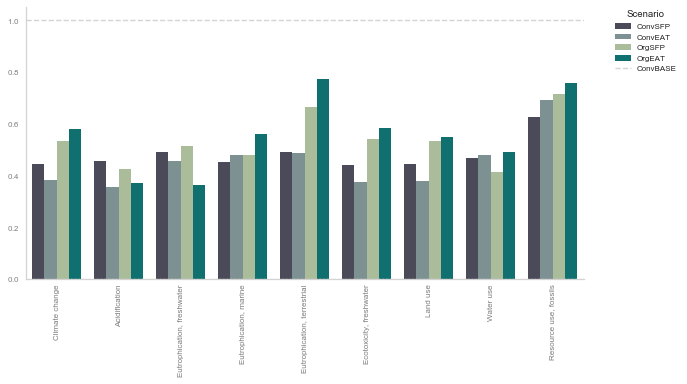

In [38]:
# PLOTTING SCENARIO COMPARISON 2018 & 2050

# Importing the normalied and transposed impacts
scenario_comparison_2018_2050 = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenario_comparison_31-10-2024.xlsx', sheet_name='comparison_ConvBASE_T', header=0)

# Reset the index and convert 'Scenario' into a regular column
#scenario_comparison = scenario_comparison.reset_index().rename(columns={'index': 'Scenario'})

# Melting the df to convert the impact categories into a single column
melted_df = pd.melt(scenario_comparison_2018_2050, id_vars='Scenario', var_name='Impact Category', value_name='Value')

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Create color palette
ocean_palette = [
    (73,71,91),    # English Violet
    (121, 148, 150),   # Cadet gray
    (171,193,150),    # Olivine
    (0, 128, 128)   # Vanilla
    
]
ocean_palette = [(r/255, g/255, b/255) for r, g, b in ocean_palette]
# Set the color palette
sns.set_palette(ocean_palette)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(10, 5))
# Create the barplot
sns.barplot(x='Scenario', y='Value', hue='Impact Category', data=melted_df)

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['Climate change', 'Acidification', 'Eutrophication, freshwater', 'Eutrophication, marine',
          'Eutrophication, terrestrial', 'Ecotoxicity, freshwater', 'Land use', 'Water use', 'Resource use, fossils']
ax.set_xticklabels(labels, rotation = 90) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax = plt.gca()
ax.axhline(y=0, color='lightgrey', linestyle='dotted')
ax.axhline(y=1, color='lightgrey', linestyle='--')

# Create a legend handle for BAU 2018
bau_legend = mlines.Line2D([], [], color='lightgrey', linestyle='--', label='ConvBASE')

# Get the existing legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Add the BAU 2018 legend handle and label to the existing handles and labels
handles.append(bau_legend)
labels.append('ConvBASE')

# Display the legend with the combined handles and labels
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Scenario')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Scenario')


# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Scenario comparison/scenario_comparison_2018_2050_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

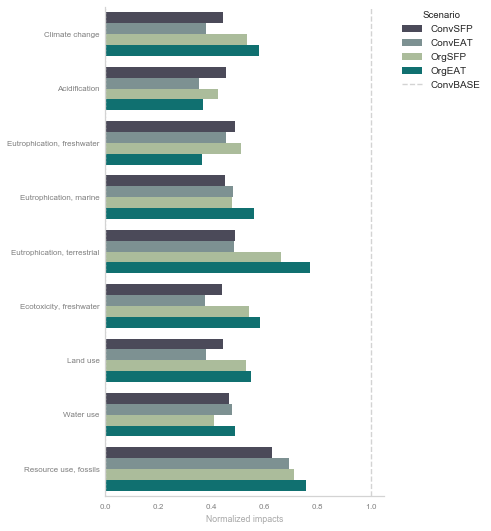

In [40]:
# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(5, 9))

# Create the horizontal barplot
sns.barplot(y='Scenario', x='Value', hue='Impact Category', data=melted_df)

# AXIS LABELS & LABEL TICKS ______________________________
# Customize the plot
plt.xlabel('Produced mass [kt]')
plt.legend(title='')

# Customize the y-axis tick labels
labels = ['Climate change', 'Acidification', 'Eutrophication, freshwater', 'Eutrophication, marine',
          'Eutrophication, terrestrial', 'Ecotoxicity, freshwater', 'Land use', 'Water use', 'Resource use, fossils']
ax.set_yticklabels(labels, rotation=0)  # Keep horizontal tick labels for categories

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_xaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

# Having ticks only in the x axis
#ax.tick_params(axis='y', which='both', bottom=False, top=False)
#ax.tick_params(axis='x', which='both', left=True)

# Changing the axis color
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis
ax.spines['left'].set_color('lightgrey')  # Left y-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='grey')

# Customize the tick label color for the x-axis
plt.tick_params(axis='x', colors='grey')

# Customize the y-axis label color
y_label = plt.ylabel('')
y_label.set_color('grey')

# Customize the x-axis label color
x_label = plt.xlabel('Normalized impacts')
x_label.set_color('darkgrey')

# LINE ______________________________
# Add a vertical line at x = 0
ax = plt.gca()
ax.axvline(x=0, color='lightgrey', linestyle='dotted')
ax.axvline(x=1, color='lightgrey', linestyle='--')

# Create a legend handle for BAU 2018
bau_legend = mlines.Line2D([], [], color='lightgrey', linestyle='--', label='ConvBASE')

# Get the existing legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Add the BAU 2018 legend handle and label to the existing handles and labels
handles.append(bau_legend)
labels.append('ConvBASE')

# Display the legend with the combined handles and labels
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Scenario', fontsize=10)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Scenario')

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Scenario comparison/scenario_comparison_2018_2050_31-10_2024_horizontal.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()


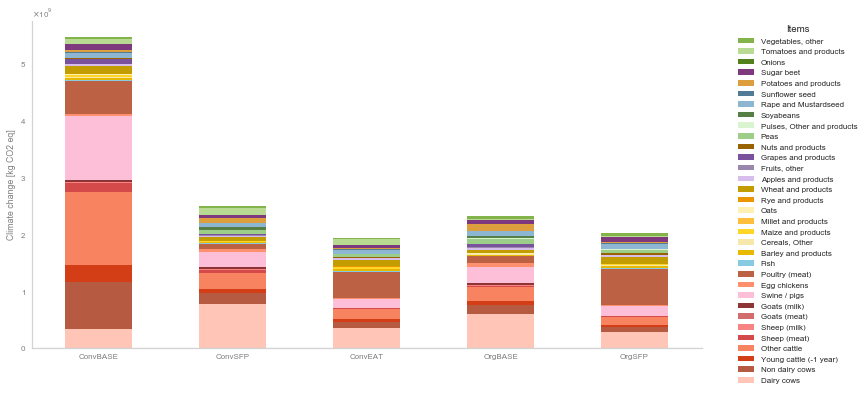

In [11]:
# PLOTTING - CLIMATE CHANGE

#Importing from excel
climate_change_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='CC_to_code', header=0)
# Setting Item as index
climate_change_graph = climate_change_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
climate_change_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Climate change [kg CO2 eq]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/climate_change_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

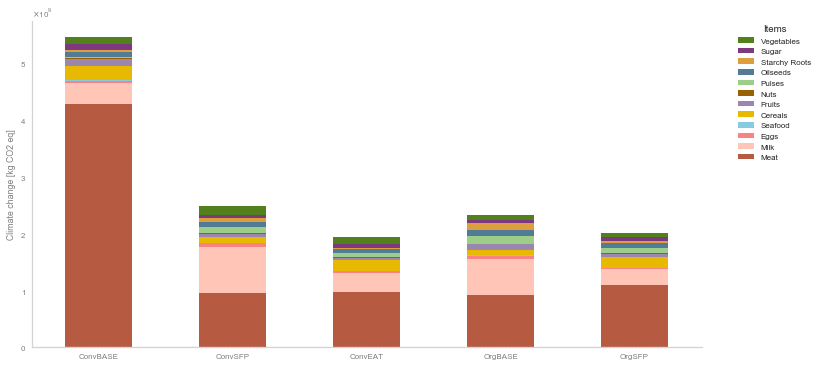

In [13]:
# PLOTTING - CLIMATE CHANGE AGGREGATED

#Importing from excel
df = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='CC_to_code', header=0)
# Setting Item as index
df = df.set_index('Item')

# Aggregating
df['Meat'] = df['Non dairy cows'] + df['Young cattle (-1 year)'] + df['Other cattle'] + df['Sheep (meat)'] + df['Goats (meat)'] + df['Swine / pigs'] + df['Poultry (meat)']
df['Milk'] = df['Dairy cows'] + df['Sheep (milk)'] + df['Goats (milk)']
df['Eggs'] = df['Egg chickens']
df['Seafood'] = df['Fish']
df['Cereals'] = df['Barley and products'] + df['Cereals, Other'] + df['Maize and products'] + df['Millet and products']+ df['Oats'] + df['Rye and products'] + df['Wheat and products']
df['Fruits'] = df['Apples and products'] + df['Fruits, other'] + df['Grapes and products']
df['Nuts'] = df['Nuts and products']
df['Pulses'] = df['Soyabeans'] + df['Pulses, Other and products'] + df['Peas']
df['Oilseeds'] = df['Rape and Mustardseed'] + df['Sunflower seed']
df['Starchy Roots'] = df['Potatoes and products']
df['Sugar'] = df['Sugar beet']
df['Vegetables'] = df['Onions'] + df['Tomatoes and products'] + df['Vegetables, other']

# Filter & copy
df = df[['Meat', 'Milk', 'Eggs', 'Seafood', 'Cereals', 'Fruits', 'Nuts', 'Pulses', 'Oilseeds', 'Starchy Roots', 'Sugar', 'Vegetables']]
climate_change_graph_aggr = df.copy()

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc4)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
climate_change_graph_aggr.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Climate change [kg CO2 eq]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    reversed(handles),
    reversed(labels),
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    title='Items',
    fancybox=True,  # Rounded corners
    edgecolor='lightgrey'  # Light grey contour
)
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/climate_change_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

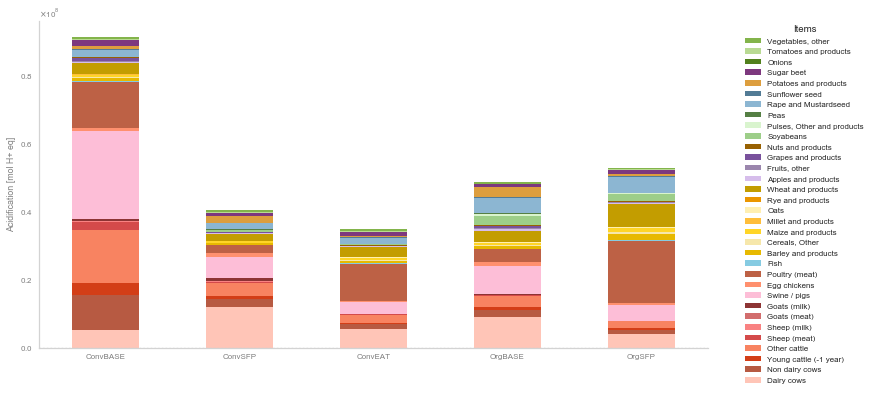

In [14]:
# PLOTTING - ACIDIFICATION

#Importing from excel
acidification_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='acidification_to_code', header=0)
# Setting Item as index
acidification_graph = acidification_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
acidification_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Acidification [mol H+ eq]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/acidification_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

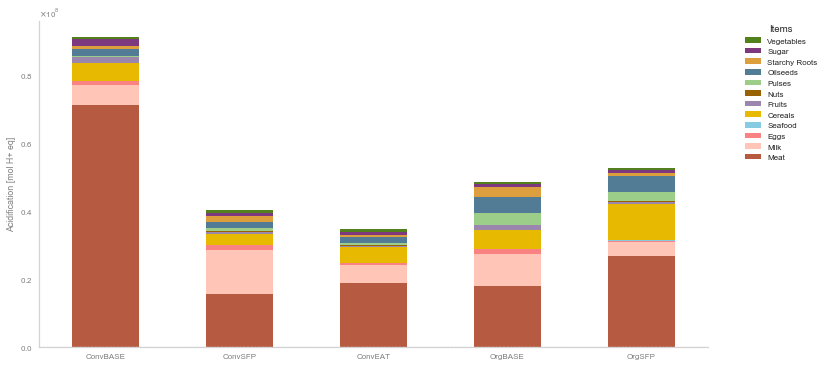

In [15]:
# PLOTTING - ACIDIFICATION AGGREGATED

#Importing from excel
df = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='acidification_to_code', header=0)
# Setting Item as index
df = df.set_index('Item')

# Aggregating
df['Meat'] = df['Non dairy cows'] + df['Young cattle (-1 year)'] + df['Other cattle'] + df['Sheep (meat)'] + df['Goats (meat)'] + df['Swine / pigs'] + df['Poultry (meat)']
df['Milk'] = df['Dairy cows'] + df['Sheep (milk)'] + df['Goats (milk)']
df['Eggs'] = df['Egg chickens']
df['Seafood'] = df['Fish']
df['Cereals'] = df['Barley and products'] + df['Cereals, Other'] + df['Maize and products'] + df['Millet and products']+ df['Oats'] + df['Rye and products'] + df['Wheat and products']
df['Fruits'] = df['Apples and products'] + df['Fruits, other'] + df['Grapes and products']
df['Nuts'] = df['Nuts and products']
df['Pulses'] = df['Soyabeans'] + df['Pulses, Other and products'] + df['Peas']
df['Oilseeds'] = df['Rape and Mustardseed'] + df['Sunflower seed']
df['Starchy Roots'] = df['Potatoes and products']
df['Sugar'] = df['Sugar beet']
df['Vegetables'] = df['Onions'] + df['Tomatoes and products'] + df['Vegetables, other']

# Filter & copy
df = df[['Meat', 'Milk', 'Eggs', 'Seafood', 'Cereals', 'Fruits', 'Nuts', 'Pulses', 'Oilseeds', 'Starchy Roots', 'Sugar', 'Vegetables']]
acidification_graph_aggr = df.copy()

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________

# Set the color palette
sns.set_palette(custom_palette_lfc4)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
acidification_graph_aggr.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Acidification [mol H+ eq]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/acidification_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

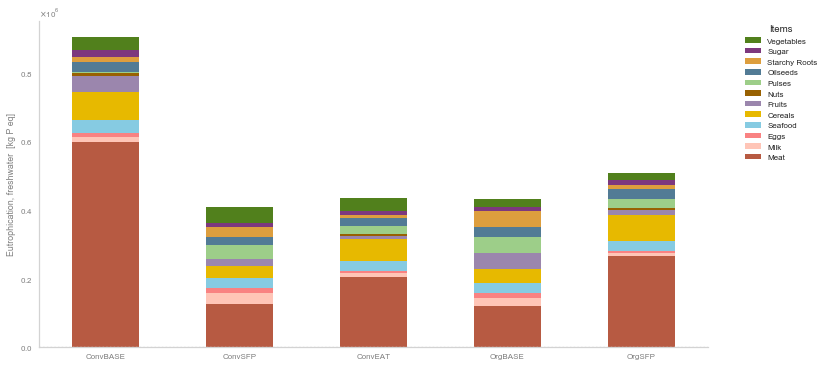

In [16]:
# PLOTTING - EUTROPHICATION, FRESHWATER AGGREGATED

#Importing from excel
df = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='eutr_fres_to_code', header=0)
# Setting Item as index
df = df.set_index('Item')

# Aggregating
df['Meat'] = df['Non dairy cows'] + df['Young cattle (-1 year)'] + df['Other cattle'] + df['Sheep (meat)'] + df['Goats (meat)'] + df['Swine / pigs'] + df['Poultry (meat)']
df['Milk'] = df['Dairy cows'] + df['Sheep (milk)'] + df['Goats (milk)']
df['Eggs'] = df['Egg chickens']
df['Seafood'] = df['Fish']
df['Cereals'] = df['Barley and products'] + df['Cereals, Other'] + df['Maize and products'] + df['Millet and products']+ df['Oats'] + df['Rye and products'] + df['Wheat and products']
df['Fruits'] = df['Apples and products'] + df['Fruits, other'] + df['Grapes and products']
df['Nuts'] = df['Nuts and products']
df['Pulses'] = df['Soyabeans'] + df['Pulses, Other and products'] + df['Peas']
df['Oilseeds'] = df['Rape and Mustardseed'] + df['Sunflower seed']
df['Starchy Roots'] = df['Potatoes and products']
df['Sugar'] = df['Sugar beet']
df['Vegetables'] = df['Onions'] + df['Tomatoes and products'] + df['Vegetables, other']

# Filter & copy
df = df[['Meat', 'Milk', 'Eggs', 'Seafood', 'Cereals', 'Fruits', 'Nuts', 'Pulses', 'Oilseeds', 'Starchy Roots', 'Sugar', 'Vegetables']]
eutr_fresh_graph_aggr = df.copy()

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc4)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
eutr_fresh_graph_aggr.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Eutrophication, freshwater  [kg P eq]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/eutr_freshwater_31-10-2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

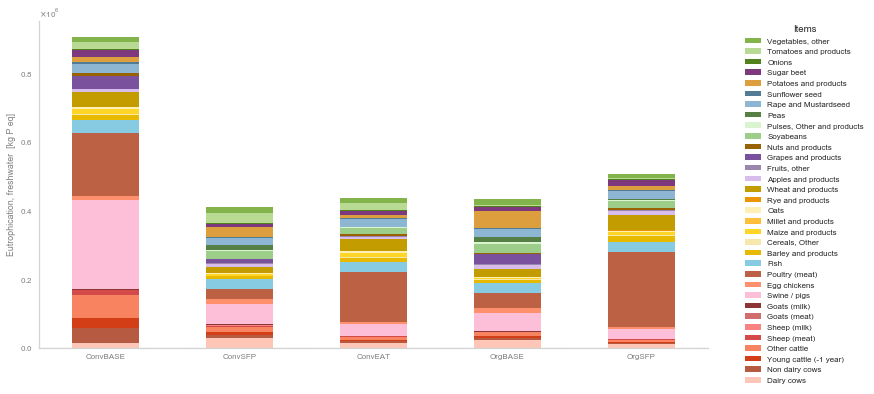

In [17]:
# PLOTTING - EUTROPHICATION, FRESHWATER

#Importing from excel
eutr_fresh_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='eutr_fres_to_code', header=0)
# Setting Item as index
eutr_fresh_graph = eutr_fresh_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
eutr_fresh_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Eutrophication, freshwater  [kg P eq]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/eutr_freshwater_31-10-2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

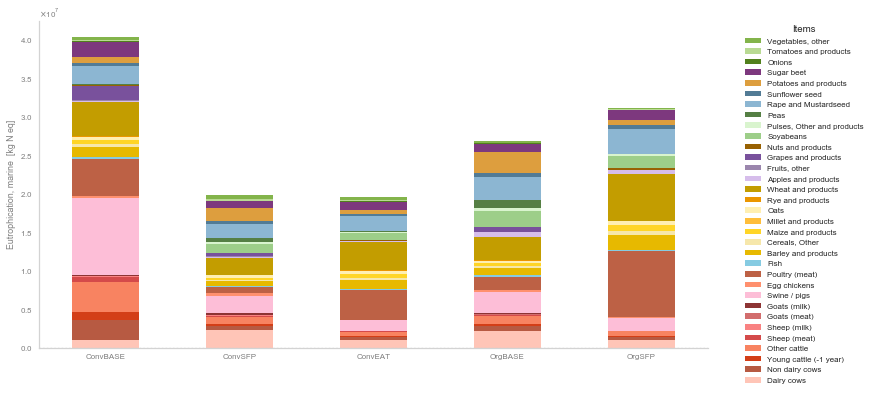

In [18]:
# PLOTTING - EUTROPHICATION, MARINE

#Importing from excel
eutr_marine_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='eutr_marine_to_code', header=0)
# Setting Item as index
eutr_marine_graph = eutr_marine_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
eutr_marine_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Eutrophication, marine  [kg N eq]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
#plt.savefig('Desktop/PDM/Graphiques/Impact categories/eutr_marine_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

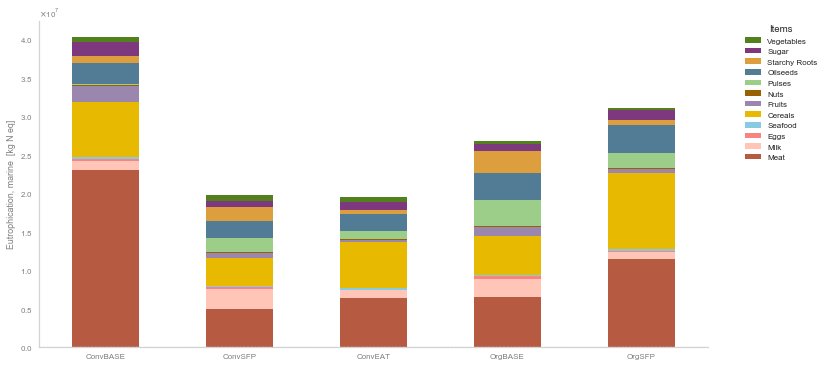

In [19]:
# PLOTTING - EUTROPHICATION, MARINE AGGREGATED

#Importing from excel
df = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='eutr_marine_to_code', header=0)
# Setting Item as index
df = df.set_index('Item')

# Aggregating
df['Meat'] = df['Non dairy cows'] + df['Young cattle (-1 year)'] + df['Other cattle'] + df['Sheep (meat)'] + df['Goats (meat)'] + df['Swine / pigs'] + df['Poultry (meat)']
df['Milk'] = df['Dairy cows'] + df['Sheep (milk)'] + df['Goats (milk)']
df['Eggs'] = df['Egg chickens']
df['Seafood'] = df['Fish']
df['Cereals'] = df['Barley and products'] + df['Cereals, Other'] + df['Maize and products'] + df['Millet and products']+ df['Oats'] + df['Rye and products'] + df['Wheat and products']
df['Fruits'] = df['Apples and products'] + df['Fruits, other'] + df['Grapes and products']
df['Nuts'] = df['Nuts and products']
df['Pulses'] = df['Soyabeans'] + df['Pulses, Other and products'] + df['Peas']
df['Oilseeds'] = df['Rape and Mustardseed'] + df['Sunflower seed']
df['Starchy Roots'] = df['Potatoes and products']
df['Sugar'] = df['Sugar beet']
df['Vegetables'] = df['Onions'] + df['Tomatoes and products'] + df['Vegetables, other']

# Filter & copy
df = df[['Meat', 'Milk', 'Eggs', 'Seafood', 'Cereals', 'Fruits', 'Nuts', 'Pulses', 'Oilseeds', 'Starchy Roots', 'Sugar', 'Vegetables']]
eutr_marine_graph_aggr = df.copy()

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc4)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
eutr_marine_graph_aggr.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Eutrophication, marine  [kg N eq]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
#plt.savefig('Desktop/PDM/Graphiques/Impact categories/eutr_marine_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

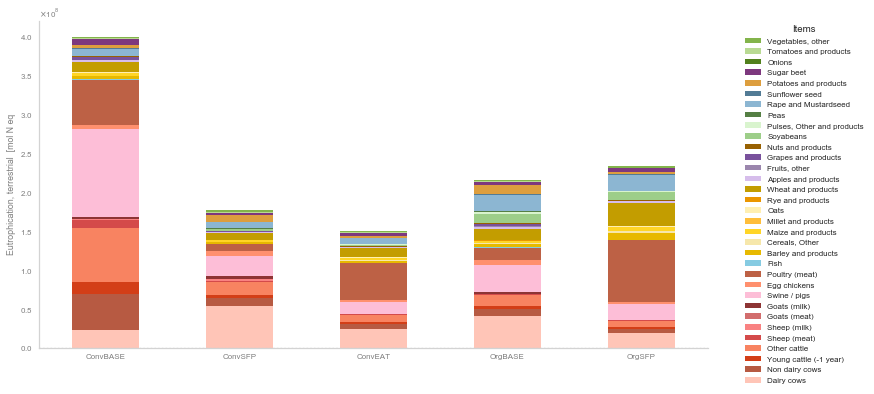

In [20]:
# PLOTTING - EUTROPHICATION, TERRESTRIAL

#Importing from excel
eutr_ter_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='eutr_ter_to_code', header=0)
# Setting Item as index
eutr_ter_graph = eutr_ter_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
eutr_ter_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Eutrophication, terrestrial  [mol N eq')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/eutr_ter_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

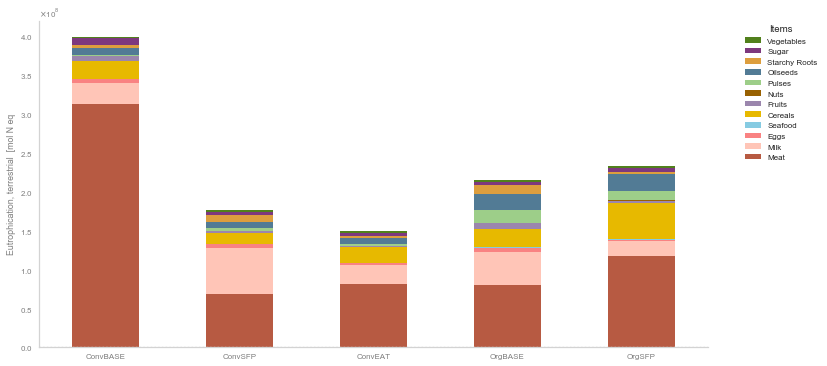

In [21]:
# PLOTTING - EUTROPHICATION, TERRESTRIAL AGGREGATED

#Importing from excel
df = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='eutr_ter_to_code', header=0)
# Setting Item as index
df = df.set_index('Item')

# Aggregating
df['Meat'] = df['Non dairy cows'] + df['Young cattle (-1 year)'] + df['Other cattle'] + df['Sheep (meat)'] + df['Goats (meat)'] + df['Swine / pigs'] + df['Poultry (meat)']
df['Milk'] = df['Dairy cows'] + df['Sheep (milk)'] + df['Goats (milk)']
df['Eggs'] = df['Egg chickens']
df['Seafood'] = df['Fish']
df['Cereals'] = df['Barley and products'] + df['Cereals, Other'] + df['Maize and products'] + df['Millet and products']+ df['Oats'] + df['Rye and products'] + df['Wheat and products']
df['Fruits'] = df['Apples and products'] + df['Fruits, other'] + df['Grapes and products']
df['Nuts'] = df['Nuts and products']
df['Pulses'] = df['Soyabeans'] + df['Pulses, Other and products'] + df['Peas']
df['Oilseeds'] = df['Rape and Mustardseed'] + df['Sunflower seed']
df['Starchy Roots'] = df['Potatoes and products']
df['Sugar'] = df['Sugar beet']
df['Vegetables'] = df['Onions'] + df['Tomatoes and products'] + df['Vegetables, other']

# Filter & copy
df = df[['Meat', 'Milk', 'Eggs', 'Seafood', 'Cereals', 'Fruits', 'Nuts', 'Pulses', 'Oilseeds', 'Starchy Roots', 'Sugar', 'Vegetables']]
eutr_ter_graph_aggr = df.copy()

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc4)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
eutr_ter_graph_aggr.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Eutrophication, terrestrial  [mol N eq')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/eutr_ter_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

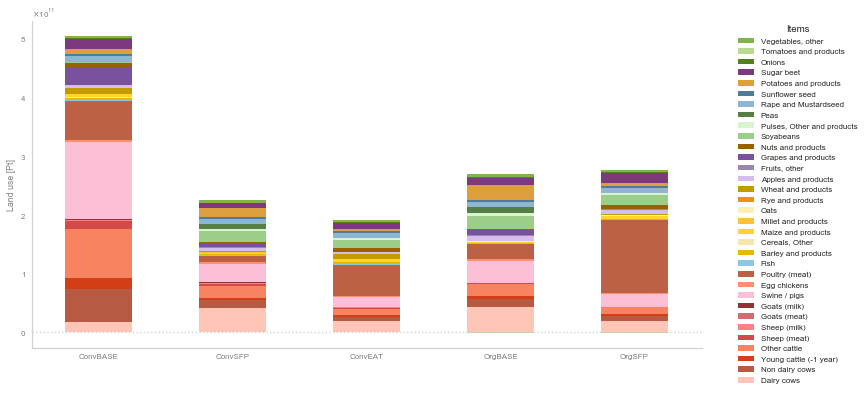

In [22]:
# PLOTTING - LAND USE

#Importing from excel
land_use_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='land_use_to_code', header=0)
# Setting Item as index
land_use_graph = land_use_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
land_use_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Land use [Pt]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/land_use_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

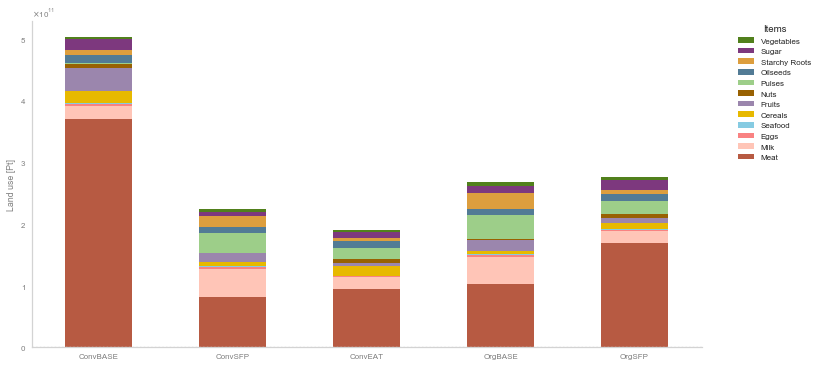

In [23]:
# PLOTTING - LAND USE AGGREGATED

#Importing from excel
df = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='land_use_to_code', header=0)
# Setting Item as index
df = df.set_index('Item')

# Aggregating
df['Meat'] = df['Non dairy cows'] + df['Young cattle (-1 year)'] + df['Other cattle'] + df['Sheep (meat)'] + df['Goats (meat)'] + df['Swine / pigs'] + df['Poultry (meat)']
df['Milk'] = df['Dairy cows'] + df['Sheep (milk)'] + df['Goats (milk)']
df['Eggs'] = df['Egg chickens']
df['Seafood'] = df['Fish']
df['Cereals'] = df['Barley and products'] + df['Cereals, Other'] + df['Maize and products'] + df['Millet and products']+ df['Oats'] + df['Rye and products'] + df['Wheat and products']
df['Fruits'] = df['Apples and products'] + df['Fruits, other'] + df['Grapes and products']
df['Nuts'] = df['Nuts and products']
df['Pulses'] = df['Soyabeans'] + df['Pulses, Other and products'] + df['Peas']
df['Oilseeds'] = df['Rape and Mustardseed'] + df['Sunflower seed']
df['Starchy Roots'] = df['Potatoes and products']
df['Sugar'] = df['Sugar beet']
df['Vegetables'] = df['Onions'] + df['Tomatoes and products'] + df['Vegetables, other']

# Filter & copy
df = df[['Meat', 'Milk', 'Eggs', 'Seafood', 'Cereals', 'Fruits', 'Nuts', 'Pulses', 'Oilseeds', 'Starchy Roots', 'Sugar', 'Vegetables']]
land_use_graph_aggr = df.copy()


# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc4)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
land_use_graph_aggr.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Land use [Pt]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/land_use_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

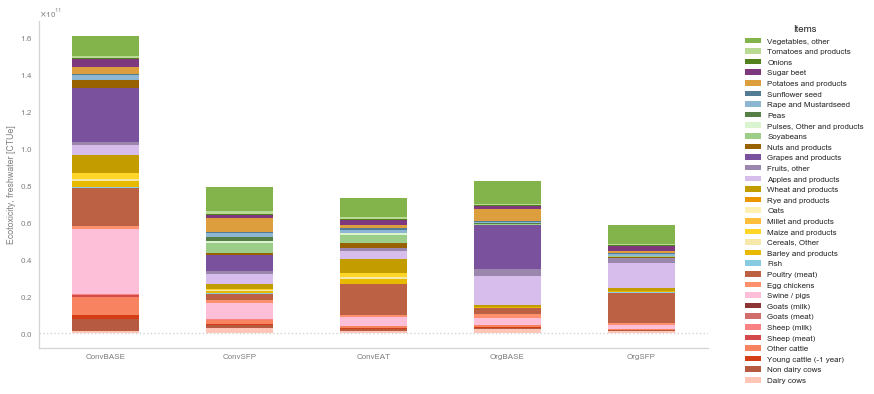

In [24]:
# PLOTTING -ECOTOX

#Importing from excel
ecotox_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='ecotox_to_code', header=0)
# Setting Item as index
ecotox_graph = ecotox_graph.set_index('Item')


# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
ecotox_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Ecotoxicity, freshwater [CTUe]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/ecotoxicity_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

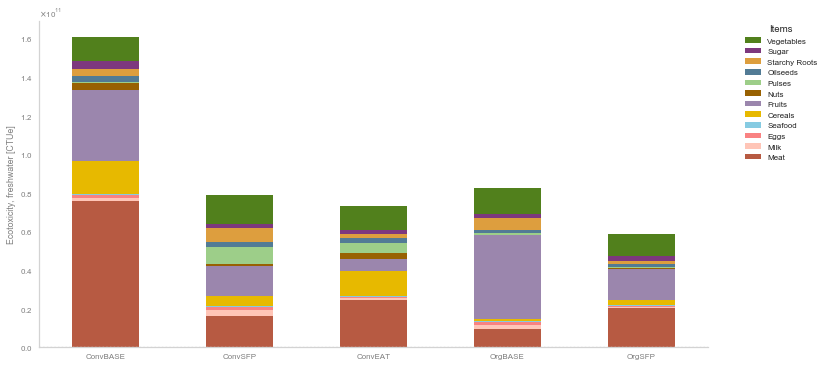

In [25]:
# PLOTTING -ECOTOX AGGREGATED

#Importing from excel
df = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='ecotox_to_code', header=0)
# Setting Item as index
df = df.set_index('Item')


# Aggregating
df['Meat'] = df['Non dairy cows'] + df['Young cattle (-1 year)'] + df['Other cattle'] + df['Sheep (meat)'] + df['Goats (meat)'] + df['Swine / pigs'] + df['Poultry (meat)']
df['Milk'] = df['Dairy cows'] + df['Sheep (milk)'] + df['Goats (milk)']
df['Eggs'] = df['Egg chickens']
df['Seafood'] = df['Fish']
df['Cereals'] = df['Barley and products'] + df['Cereals, Other'] + df['Maize and products'] + df['Millet and products']+ df['Oats'] + df['Rye and products'] + df['Wheat and products']
df['Fruits'] = df['Apples and products'] + df['Fruits, other'] + df['Grapes and products']
df['Nuts'] = df['Nuts and products']
df['Pulses'] = df['Soyabeans'] + df['Pulses, Other and products'] + df['Peas']
df['Oilseeds'] = df['Rape and Mustardseed'] + df['Sunflower seed']
df['Starchy Roots'] = df['Potatoes and products']
df['Sugar'] = df['Sugar beet']
df['Vegetables'] = df['Onions'] + df['Tomatoes and products'] + df['Vegetables, other']

# Filter & copy
df = df[['Meat', 'Milk', 'Eggs', 'Seafood', 'Cereals', 'Fruits', 'Nuts', 'Pulses', 'Oilseeds', 'Starchy Roots', 'Sugar', 'Vegetables']]
ecotox_graph_aggr = df.copy()


# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc4)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
ecotox_graph_aggr.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Ecotoxicity, freshwater [CTUe]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/ecotoxicity_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

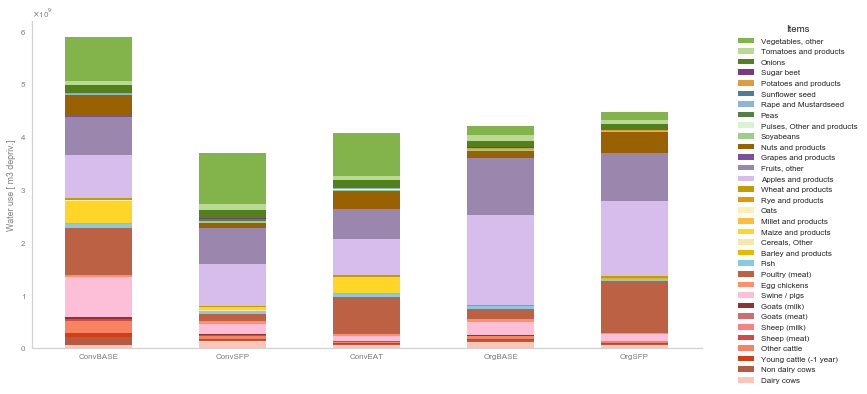

In [26]:
# PLOTTING - WATER USE

#Importing from excel
water_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='water_use_to_code', header=0)
# Setting Item as index
water_graph = water_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
water_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Water use [ m3 depriv.]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/water_use_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

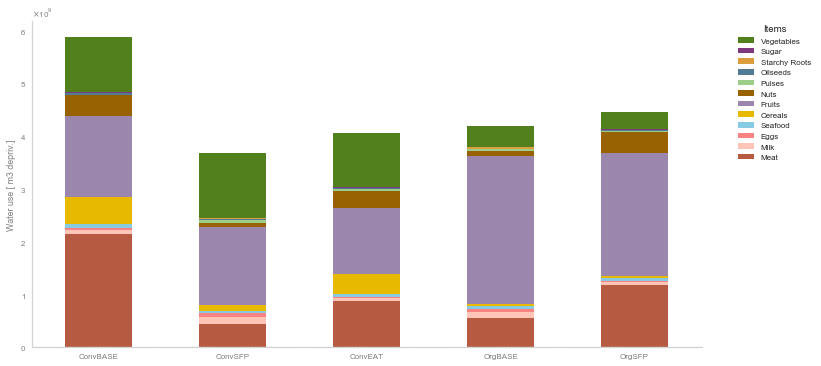

In [27]:
# PLOTTING - WATER USE AGGREGATED

#Importing from excel
df = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='water_use_to_code', header=0)
# Setting Item as index
df = df.set_index('Item')

# Aggregating
df['Meat'] = df['Non dairy cows'] + df['Young cattle (-1 year)'] + df['Other cattle'] + df['Sheep (meat)'] + df['Goats (meat)'] + df['Swine / pigs'] + df['Poultry (meat)']
df['Milk'] = df['Dairy cows'] + df['Sheep (milk)'] + df['Goats (milk)']
df['Eggs'] = df['Egg chickens']
df['Seafood'] = df['Fish']
df['Cereals'] = df['Barley and products'] + df['Cereals, Other'] + df['Maize and products'] + df['Millet and products']+ df['Oats'] + df['Rye and products'] + df['Wheat and products']
df['Fruits'] = df['Apples and products'] + df['Fruits, other'] + df['Grapes and products']
df['Nuts'] = df['Nuts and products']
df['Pulses'] = df['Soyabeans'] + df['Pulses, Other and products'] + df['Peas']
df['Oilseeds'] = df['Rape and Mustardseed'] + df['Sunflower seed']
df['Starchy Roots'] = df['Potatoes and products']
df['Sugar'] = df['Sugar beet']
df['Vegetables'] = df['Onions'] + df['Tomatoes and products'] + df['Vegetables, other']

# Filter & copy
df = df[['Meat', 'Milk', 'Eggs', 'Seafood', 'Cereals', 'Fruits', 'Nuts', 'Pulses', 'Oilseeds', 'Starchy Roots', 'Sugar', 'Vegetables']]
water_graph_aggr = df.copy()

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc4)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
water_graph_aggr.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Water use [ m3 depriv.]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/water_use_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

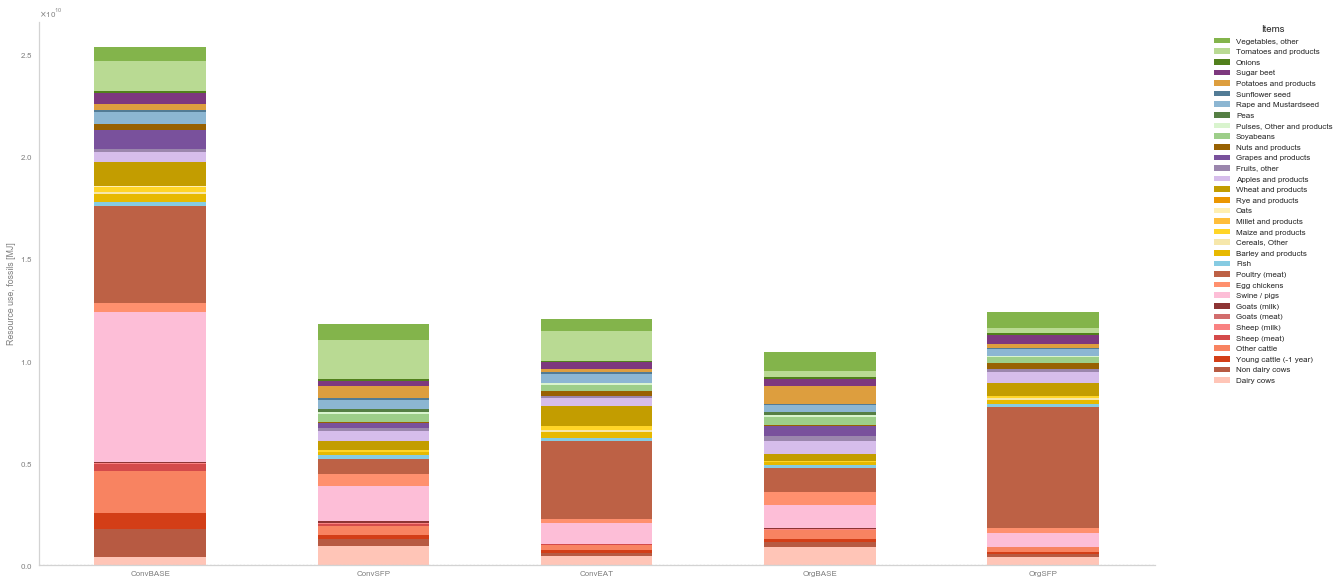

In [28]:
# PLOTTING - RESOURCE USE

#Importing from excel
resource_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='resource_to_code', header=0)
# Setting Item as index
resource_graph = resource_graph.set_index('Item')


# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(20, 10))
# Create the stacked bar plot
resource_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Resource use, fossils [MJ]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/resource_fossil_use_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

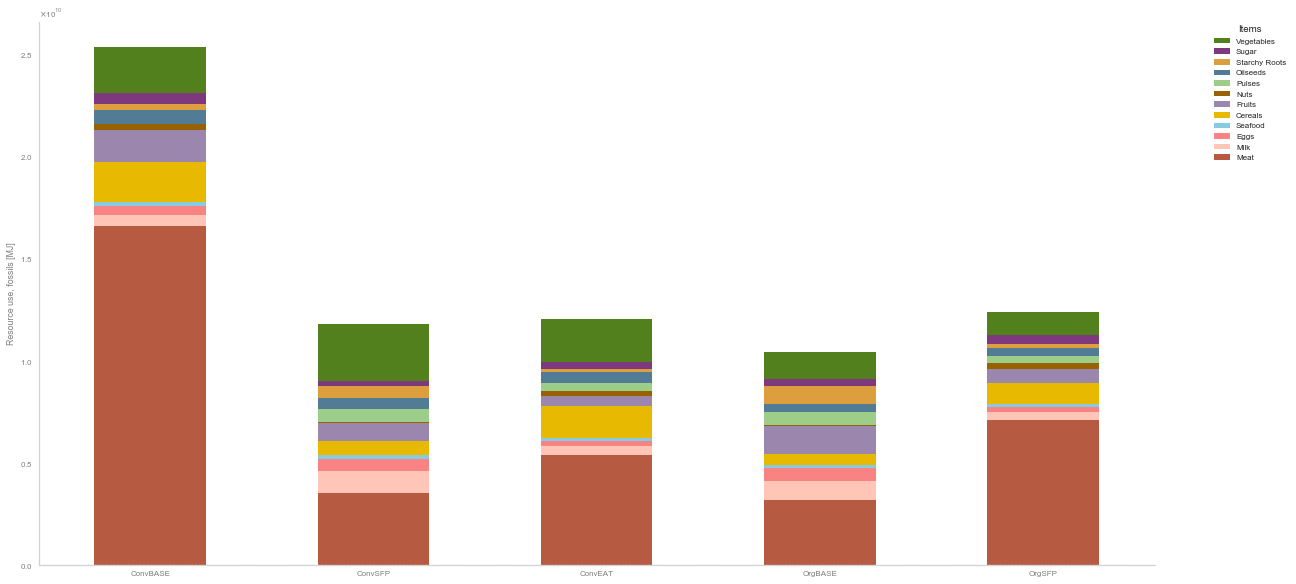

In [29]:
# PLOTTING - RESOURCE USE AGGREGATED

#Importing from excel
df = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code_09-12-2024.xlsx', sheet_name='resource_to_code', header=0)
# Setting Item as index
df = df.set_index('Item')

# Aggregating
df['Meat'] = df['Non dairy cows'] + df['Young cattle (-1 year)'] + df['Other cattle'] + df['Sheep (meat)'] + df['Goats (meat)'] + df['Swine / pigs'] + df['Poultry (meat)']
df['Milk'] = df['Dairy cows'] + df['Sheep (milk)'] + df['Goats (milk)']
df['Eggs'] = df['Egg chickens']
df['Seafood'] = df['Fish']
df['Cereals'] = df['Barley and products'] + df['Cereals, Other'] + df['Maize and products'] + df['Millet and products']+ df['Oats'] + df['Rye and products'] + df['Wheat and products']
df['Fruits'] = df['Apples and products'] + df['Fruits, other'] + df['Grapes and products']
df['Nuts'] = df['Nuts and products']
df['Pulses'] = df['Soyabeans'] + df['Pulses, Other and products'] + df['Peas']
df['Oilseeds'] = df['Rape and Mustardseed'] + df['Sunflower seed']
df['Starchy Roots'] = df['Potatoes and products']
df['Sugar'] = df['Sugar beet']
df['Vegetables'] = df['Onions'] + df['Tomatoes and products'] + df['Vegetables, other']

# Filter & copy
df = df[['Meat', 'Milk', 'Eggs', 'Seafood', 'Cereals', 'Fruits', 'Nuts', 'Pulses', 'Oilseeds', 'Starchy Roots', 'Sugar', 'Vegetables']]
resource_graph_aggr = df.copy()

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc4)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(20, 10))
# Create the stacked bar plot
resource_graph_aggr.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgBASE', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Resource use, fossils [MJ]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/resource_fossil_use_31-10_2024.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

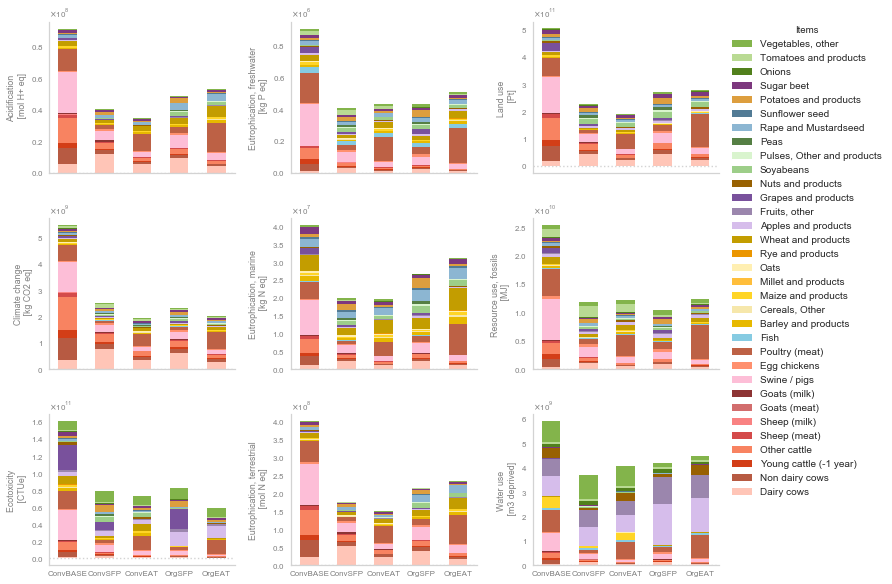

In [44]:
# GRAPHS - SUBPLOTS

scenarios = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgSFP', 'OrgEAT']

fig, axs = plt.subplots(3, 3, figsize=(12, 10), sharex=True)  # Create a 4x1 subplot with shared x-axis

# Plot stacked bar plot 1
acidification_graph.plot(kind='bar', stacked=True, ax=axs[0,0], edgecolor='None', legend=False)

# Plot stacked bar plot 2
ecotox_graph.plot(kind='bar', stacked=True, ax=axs[2,0], edgecolor='None', legend=False)

# Plot stacked bar plot 3
eutr_fresh_graph.plot(kind='bar', stacked=True, ax=axs[0,1], edgecolor='None', legend=False)

# Plot stacked bar plot 4
eutr_marine_graph.plot(kind='bar', stacked=True, ax=axs[1,1], edgecolor='None', legend=False)

# Plot stacked bar plot 5
eutr_ter_graph.plot(kind='bar', stacked=True, ax=axs[2,1], edgecolor='None', legend=False)

# Plot stacked bar plot 1
climate_change_graph.plot(kind='bar', stacked=True, ax=axs[1,0], edgecolor='None', legend=False)

# Plot stacked bar plot 2
land_use_graph.plot(kind='bar', stacked=True, ax=axs[0,2], edgecolor='None', legend=False)

# Plot stacked bar plot 3
water_graph.plot(kind='bar', stacked=True, ax=axs[2,2], edgecolor='None', legend=False)

# Plot stacked bar plot 4
resource_graph.plot(kind='bar', stacked=True, ax=axs[1,2], edgecolor='None', legend=False)



# You can add more customization to each subplot if needed

# Set the grid style
sns.set_style('white')
# Set the seaborn context - for the text size
sns.set_context('paper')
sns.set_palette(custom_palette_lfc3)

# Loop through all subplots to change axis colors
for i, ax in enumerate(axs.flatten()):
    ax.spines['left'].set_color('lightgrey')  # Left y-axis
    ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis
    # Remove the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Set the tick color
    ax.tick_params(colors='lightgrey')
    # Customize the axis label color
    ax.set_xlabel(''.format(i + 1), color='grey')  # Change x-axis label color
    ax.set_ylabel('Y Label for Plot {}'.format(i + 1), color='grey')  # Change y-axis label color
    # Set the color of the tick labels
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    # Changing y-axis unit formatting
    ax.get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    # Add a horizontal line at y = 0
    ax.axhline(y=0, color='lightgrey', linestyle='dotted')
    # Customize the x-axis tick labels
    ax.set_xticklabels(scenarios, rotation = 0)
    
    
# Add labels and legends
axs[0,0].set_ylabel('Acidification \n [mol H+ eq]')
axs[2,0].set_ylabel('Ecotoxicity \n [CTUe]')
axs[0,1].set_ylabel('Eutrophication, freshwater \n [kg P eq]')
axs[1,1].set_ylabel('Eutrophication, marine \n [kg N eq]')
axs[2,1].set_ylabel('Eutrophication, terrestrial \n [mol N eq]')
axs[1,0].set_ylabel('Climate change \n [kg CO2 eq]')
axs[0,2].set_ylabel('Land use \n [Pt]')
axs[2,2].set_ylabel('Water use \n [m3 deprived]')
axs[1,2].set_ylabel('Resource use, fossils \n [MJ]')
#axs[3].set_xlabel('X Label for All Plots')
#axs[0].legend()
#axs[1].legend()

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
axs[0,2].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items', fontsize=10)
#legend = axs[1, 2].legend(reversed(handles), reversed(labels), loc='upper left', title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0)

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/Valorisation Master/Graphiques/environmental_impacts_31-10-24.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

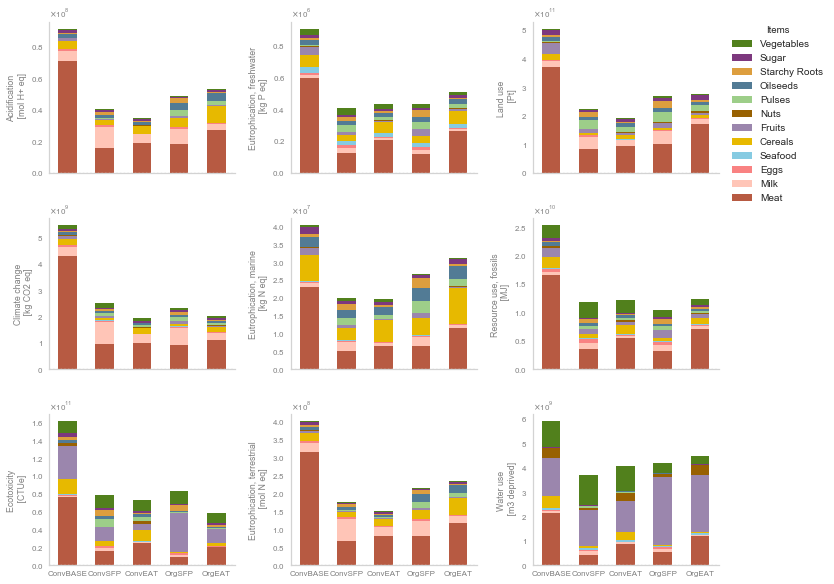

In [36]:
# GRAPHS - SUBPLOTS AGGREGATED ITEMS

scenarios = ['ConvBASE', 'ConvSFP', 'ConvEAT', 'OrgSFP', 'OrgEAT']

fig, axs = plt.subplots(3, 3, figsize=(12, 10), sharex=True)  # Create a 4x1 subplot with shared x-axis

# Plot stacked bar plot 1
acidification_graph_aggr.plot(kind='bar', stacked=True, ax=axs[0,0], edgecolor='None', legend=False)

# Plot stacked bar plot 2
ecotox_graph_aggr.plot(kind='bar', stacked=True, ax=axs[2,0], edgecolor='None', legend=False)

# Plot stacked bar plot 3
eutr_fresh_graph_aggr.plot(kind='bar', stacked=True, ax=axs[0,1], edgecolor='None', legend=False)

# Plot stacked bar plot 4
eutr_marine_graph_aggr.plot(kind='bar', stacked=True, ax=axs[1,1], edgecolor='None', legend=False)

# Plot stacked bar plot 5
eutr_ter_graph_aggr.plot(kind='bar', stacked=True, ax=axs[2,1], edgecolor='None', legend=False)

# Plot stacked bar plot 1
climate_change_graph_aggr.plot(kind='bar', stacked=True, ax=axs[1,0], edgecolor='None', legend=False)

# Plot stacked bar plot 2
land_use_graph_aggr.plot(kind='bar', stacked=True, ax=axs[0,2], edgecolor='None', legend=False)

# Plot stacked bar plot 3
water_graph_aggr.plot(kind='bar', stacked=True, ax=axs[2,2], edgecolor='None', legend=False)

# Plot stacked bar plot 4
resource_graph_aggr.plot(kind='bar', stacked=True, ax=axs[1,2], edgecolor='None', legend=False)



# You can add more customization to each subplot if needed

# Set the grid style
sns.set_style('white')
# Set the seaborn context - for the text size
sns.set_context('paper')

# Loop through all subplots to change axis colors
for i, ax in enumerate(axs.flatten()):
    ax.spines['left'].set_color('lightgrey')  # Left y-axis
    ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis
    # Remove the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Set the tick color
    ax.tick_params(colors='lightgrey')
    # Customize the axis label color
    ax.set_xlabel(''.format(i + 1), color='grey')  # Change x-axis label color
    ax.set_ylabel('Y Label for Plot {}'.format(i + 1), color='grey')  # Change y-axis label color
    # Set the color of the tick labels
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    # Changing y-axis unit formatting
    ax.get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    # Add a horizontal line at y = 0
    ax.axhline(y=0, color='lightgrey', linestyle='dotted')
    # Customize the x-axis tick labels
    ax.set_xticklabels(scenarios, rotation = 0)
    
    
# Add labels and legends
axs[0,0].set_ylabel('Acidification \n [mol H+ eq]')
axs[2,0].set_ylabel('Ecotoxicity \n [CTUe]')
axs[0,1].set_ylabel('Eutrophication, freshwater \n [kg P eq]')
axs[1,1].set_ylabel('Eutrophication, marine \n [kg N eq]')
axs[2,1].set_ylabel('Eutrophication, terrestrial \n [mol N eq]')
axs[1,0].set_ylabel('Climate change \n [kg CO2 eq]')
axs[0,2].set_ylabel('Land use \n [Pt]')
axs[2,2].set_ylabel('Water use \n [m3 deprived]')
axs[1,2].set_ylabel('Resource use, fossils \n [MJ]')
#axs[3].set_xlabel('X Label for All Plots')
#axs[0].legend()
#axs[1].legend()

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
axs[0,2].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items',fontsize=10)
#legend = axs[1, 2].legend(reversed(handles), reversed(labels), loc='upper left', title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0)

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/Valorisation Master/Graphiques/environmental_impacts_aggregated_31-10-24.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

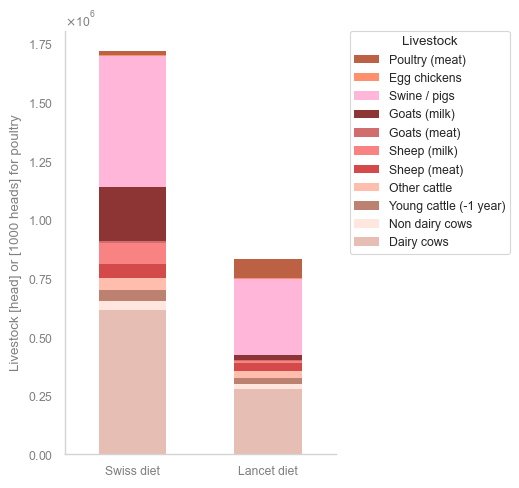

In [107]:
# GRAPH LIVESTOCK COUNT PER SCENARIO - UNIT CHANGE FOR POULTRY

# Creating a copy
livestock_graph_1 = livestock_T.copy()

# Dropping the rows that repeat themselves
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals org BAU Swiss [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals conv BAU Swiss [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals org BAU Lancet [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals conv BAU Lancet [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals OA Swiss [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals OA Lancet [head]'].index)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_livestock)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(3.5, 5.5))
# Create the stacked bar plot
livestock_graph_1.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Livestock [head] or [1000 heads] for poultry')
plt.legend(title='Crop Items')
# Customize the x-axis tick labels
labels = ['Swiss diet', 'Lancet diet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))


# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
#x_label = plt.xlabel('X-axis Label')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Livestock [head] or [1000 heads] for poultry')
y_label.set_color('grey')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LEGEND BOX ______________________________
# Customize the legend box
legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Livestock')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
#plt.savefig('Desktop/PDM/Graphiques/Scenario comparison/livestock_heads_2.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

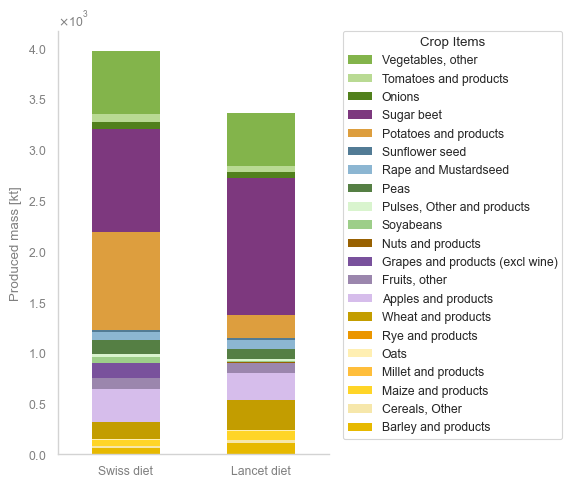

In [108]:
# GRAPH - PRODUCED CROP MASS

# Creating a copy
crops_graph_1 = crops_fish_T.copy()

# Dropping the row with Fish
#crops_graph_1 = crops_graph_1.drop(crops_graph_1[crops_graph_1['Item'] == 'Fish'].index)

# Dropping the fish column
#columns_to_drop = ['Mass org BAU Swiss [kt]', 'Mass conv BAU Swiss [kt]', 'Mass BAU Swiss [kt]', 'Mass org BAU Lancet [kt]', 'Mass conv BAU Lancet [kt]', 'Mass BAU Lancet [kt]' ]
columns_to_drop = ['Fish']
crops_graph_2  = crops_graph_1 .drop(columns_to_drop, axis=1)

# Dropping the rows that repeat themselves
crops_graph_2 = crops_graph_2.drop(crops_graph_2[crops_graph_2['Item'] == 'Mass org BAU Swiss [kt]'].index)
crops_graph_2 = crops_graph_2.drop(crops_graph_2[crops_graph_2['Item'] == 'Mass conv BAU Swiss [kt]'].index)
crops_graph_2 = crops_graph_2.drop(crops_graph_2[crops_graph_2['Item'] == 'Mass org BAU Lancet [kt]'].index)
crops_graph_2 = crops_graph_2.drop(crops_graph_2[crops_graph_2['Item'] == 'Mass conv BAU Lancet [kt]'].index)
crops_graph_2 = crops_graph_2.drop(crops_graph_2[crops_graph_2['Item'] == 'Mass BAU Swiss [kt]'].index)
crops_graph_2 = crops_graph_2.drop(crops_graph_2[crops_graph_2['Item'] == 'Mass BAU Lancet [kt]'].index)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_crops)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(3.5, 5.5))
# Create the stacked bar plot
crops_graph_2.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='Crop Items')
# Customize the x-axis tick labels
labels = ['Swiss diet', 'Lancet diet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
#x_label = plt.xlabel('X-axis Label')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Produced mass [kt]')
y_label.set_color('grey')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LEGEND BOX ______________________________
# Customize the legend box
legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Crop Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
#plt.savefig('Desktop/PDM/Graphiques/Scenario comparison/crop_production_mass.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()


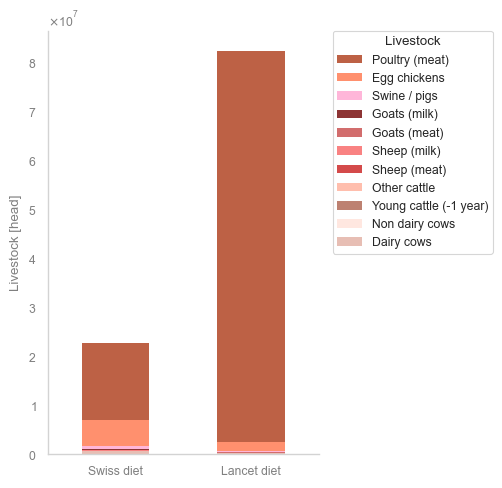

In [106]:
# GRAPH LIVESTOCK COUNT PER SCENARIO

# Creating a copy
livestock_graph_1 = livestock_T2.copy()

# Dropping the rows that repeat themselves
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals org BAU Swiss [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals conv BAU Swiss [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals org BAU Lancet [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals conv BAU Lancet [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals OA Swiss [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals OA Lancet [head]'].index)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_livestock)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(3.5, 5.5))
# Create the stacked bar plot
livestock_graph_1.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Livestock [head] or [1000 heads] for poultry')
plt.legend(title='Crop Items')
# Customize the x-axis tick labels
labels = ['Swiss diet', 'Lancet diet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Livestock [head]')
y_label.set_color('grey')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LEGEND BOX ______________________________
# Customize the legend box
legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Livestock')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
#plt.savefig('Desktop/PDM/Graphiques/Scenario comparison/livestock_heads_1.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()